#### Необходимые библиотеки для занятия    
Обычно <b>ставятся автоматически</b> при установке jupyter notebook:
<ul>
<li><i>numpy</i> - для работы с массивами

```!pip3 install numpy```
</li>
<li><i>sklearn</i> - блиблиотека для работы с данными, содержит большинство алгоритмов машинного обучения</li>

```!pip3 install sklearn```

</li>
<li><i>pandas</i> - библиотека для удобной работы с данными как с DataFrame

```!pip3 install pandas```
</li>
<li><i>matplotlib</i> - библиотека для визуализации

```!pip3 install matplotlib```
</li>
</ul>

Обычно <b>не ставятся автоматически</b> при установке jupyter notebook:
<ul>
<li><i>rusenttokenize</i> - для разбиения текста на предложения (русский язык)

```!pip3 install rusenttokenize```
</li>
<li><i>nltk</i> - фреймворк для обработки ЕЯ

```!pip3 install nltk```

Также необходимо выполнить следующие команды, чтобы загрузить данные:


```import nltk```

```nltk.download('treebank')```

```nltk.download('stopwords')```

```nltk.download('punkt')```

<li><i>python-crfsuite</i> - для использования CRF</li>

```!pip3 install python-crfsuite```
</li>
<li><i>pymorphy2</i> - морфологический анализатор русского языка

```!pip3 install pymorphy2```
</li>
</ul>

### For colab:
Install libs

In [1]:
import nltk
nltk.download('treebank')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
!pip install python-crfsuite
!pip install pymorphy2
!pip3 install sklearn-crfsuite

    100% |████████████████████████████████| 757kB 20.8MB/s 
    100% |████████████████████████████████| 51kB 2.5MB/s 
    100% |████████████████████████████████| 7.1MB 6.1MB/s 


In [3]:
!pip3 install rusenttokenize

### Load data

In [4]:
!wget -O negative.txt https://raw.githubusercontent.com/king-menin/nlp-hse-winter2018/master/lecture%201.%20intro%20to%20nlp/negative.txt
!wget -O positive.txt https://raw.githubusercontent.com/king-menin/nlp-hse-winter2018/master/lecture%201.%20intro%20to%20nlp/positive.txt

--2019-01-21 13:44:10--  https://raw.githubusercontent.com/king-menin/nlp-hse-winter2018/master/lecture%201.%20intro%20to%20nlp/negative.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 637742 (623K) [text/plain]
Saving to: ‘negative.txt’

negative.txt        100%[===================>] 622.79K  --.-KB/s    in 0.05s   

2019-01-21 13:44:10 (12.2 MB/s) - ‘negative.txt’ saved [637742/637742]

--2019-01-21 13:44:11--  https://raw.githubusercontent.com/king-menin/nlp-hse-winter2018/master/lecture%201.%20intro%20to%20nlp/positive.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sen

In [5]:
!ls

negative.txt  positive.txt  sample_data


# Часть 1. Предобработка текста и классификация

In [0]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
np.random.seed(1)

## 1.1 Прочитайте текст в файлах positive.txt и negative.txt

In [0]:
with open("positive.txt", "r", encoding="utf-8") as file:
    positive_plain = file.read()

with open("negative.txt", "r", encoding="utf-8") as file:
    negative_plain = file.read()

In [8]:
print(positive_plain[:400], negative_plain[:400], sep="\n\n")

@first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа). Да, все-таки он немного похож на него Но мой мальчик все равно лучше:D. RT @KatiaCheh: Ну ты идиотка) я испугалась за тебя!!!. RT @digger2912: "Кто то в углу сидит и погибает от голода, а мы ещё 2 порции взяли, хотя уже и так жрать не хотим" :DD . @irina_dyshkant Вот что значит страшилка :D

Но бли

на работе был полный пиддес :| и так каждое закрытие месяца, я же свихнусь так D:. Коллеги сидят рубятся в Urban terror, а я из-за долбанной винды не могу :(. @elina_4post как говорят обещаного три года ждут((. Желаю хорошего полёта и удачной посадки,я буду очень сильно скучать( . Обновил за каким-то лешим surf, теперь не работает простоплеер :(. Котёнка вчера носик разбила, плакала и расстраивала


## 1.2. Разбейте данные на предложения

Для токенизации используйте nltk.sent_tokenize. чтобы удалить имен пользователей из сообщений напишите регулярное выражение.

<b>Классы символов в регулярных выражениях</b>:

[A-Z] – символы верхнего регистра (латиница)

[a-z] – символы нижнего регистра (латиница)

[А-Я] – символы верхнего регистра (кириллица)

[а-я] – символы нижнего регистра (кириллица)

[0-9] или \d – цифра

[^0-9] или \D – любой символ, кроме цифры

. – Один любой символ, кроме новой строки \n.

? – 0 или 1 вхождение шаблона слева

\+ – 1 и более вхождений шаблона слева

\* – 0 и более вхождений шаблона слева

\w – Любая цифра или буква (\W — все, кроме буквы или цифры)

\d – Любая цифра [0-9] (\D — все, кроме цифры)

\s – Любой пробельный символ (\S — любой непробельнй символ)

\b – Граница слова

[..] – дин из символов в скобках ([^..] — любой символ, кроме тех, что в скобках)

\ – Экранирование специальных символов (\. означает точку или \+ — знак «плюс»)

^ и $ – Начало и конец строки соответственно

{n,m} – От n до m вхождений ({,m} — от 0 до m)

a|b – Соответствует a или b

() – Группирует выражение и возвращает найденный текст

\t, \n, \r – Символ табуляции, новой строки и возврата каретки соответственно

In [0]:
import string

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
import re
from nltk import sent_tokenize
# from rusenttokenize import ru_sent_tokenize


def split_data(text):
    # Избавляемся от имен пользователей, указанных в письмах
    name = <your code here>
    res = name.sub("", text)
    # Удалите лишние переносы строк и разбейте на предложения по знаку "."
    res = <your code here>
    return res

In [0]:
positive = split_data(positive_plain)
negative = split_data(negative_plain)

In [15]:
print(positive[0])

хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа).


In [16]:
len(positive), len(negative)

(5668, 5805)

In [0]:
pos_labels = [1] * len(positive)

In [0]:
neg_labels = [0] * len(negative)

Объединим все в один список

In [0]:
all_text = positive + negative
all_labels = pos_labels + neg_labels

In [20]:
len(all_text)

11473

## 1.3. Удалите пустые строки, если они есть

In [0]:
all_text_ = []
all_labels_ = []

for text, label in zip(all_text, all_labels):
  if len(text) > 1:
    all_text_.append(text)
    all_labels_.append(label)

all_text = all_text_
all_labels = all_labels_

## 1. 4. Предварительный анализ коллекции

#### Средняя длина предложений

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(all_text)

In [0]:
len_data = df[0].apply(len)

In [25]:
len_data.describe()

count    11392.000000
mean        61.223227
std         35.801275
min          2.000000
25%         37.000000
50%         55.000000
75%         81.000000
max        375.000000
Name: 0, dtype: float64

#### Длины текстов в символах

In [26]:
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


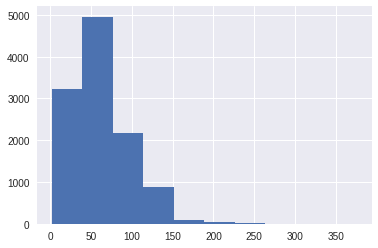

In [27]:
fig, ax = plt.subplots()

n, bins, patches = ax.hist(len_data.tolist())

fig.show()

#### Самые частые слова

Токенизируйте предложения на слова (nltk.word_tokenize)

In [0]:
from nltk import word_tokenize


all_text = [word_tokenize(line) for line in all_text]

In [29]:
from nltk import FreqDist


n_types = []
n_tokens = []
fd = FreqDist()
for line in all_text:
    fd.update(line)
    n_types.append(len(fd))
    n_tokens.append(sum(list(fd.values())))
for i in fd.most_common(10):
    print(i)

('.', 9363)
('(', 9258)
(')', 8718)
(',', 8268)
(':', 4719)
('не', 3023)
('!', 2897)
('и', 2387)
('в', 2329)
('я', 2322)


#### Закон Ципфа

В любом достаточно большом тексте ранг типа обратно пропорционален его частоте: f=a/r

f – частота типа, r – ранг типа, a – параметр, для славянских языков – около 0.07

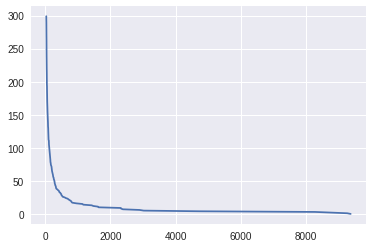

In [30]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

#### Закон Хипса

С увеличением длины текста (количества токенов), количество типов увеличивается в соответствии с законом: |V|=K∗N^b

N – число токенов, |V| – количество типов в словаре, K,b – параметры, обычно K∈[10,100],b∈[0.4,0.6]

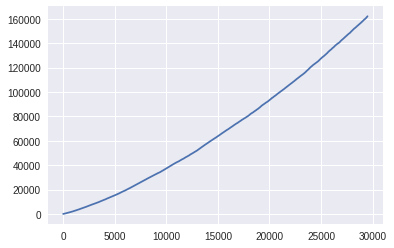

In [31]:
fig, ax = plt.subplots()
ax.plot(n_types, n_tokens)
plt.show()

## 1.5. Подготовим данные для nltk.NaiveBayesClassifier

Классификатор принимает данные о предложении в виде словаря {"слово": #количество встреч в предожении}

Используйсте Counter. Пример работы:

`Counter('abracadabra')`

>Counter({'a': 5, 'b': 2, 'c': 1, 'd': 1, 'r': 2})

In [0]:
from collections import Counter

In [33]:
print(all_text[0])

['хоть', 'я', 'и', 'школота', ',', 'но', 'поверь', ',', 'у', 'нас', 'то', 'же', 'самое', ':', 'D', 'общество', 'профилирующий', 'предмет', 'типа', ')', '.']


In [34]:
all_text = <your code here>
print(all_text[0])

Counter({',': 2, 'хоть': 1, 'я': 1, 'и': 1, 'школота': 1, 'но': 1, 'поверь': 1, 'у': 1, 'нас': 1, 'то': 1, 'же': 1, 'самое': 1, ':': 1, 'D': 1, 'общество': 1, 'профилирующий': 1, 'предмет': 1, 'типа': 1, ')': 1, '.': 1})


## 1.6. Обучим модель

In [0]:
from sklearn.metrics import accuracy_score
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split

In [0]:
train_indecies, test_indecies = train_test_split(np.arange(len(all_text)), test_size=0.3, random_state=1)

In [0]:
all_text = np.array(all_text)
all_labels = np.array(all_labels)

X_train, X_test = all_text[train_indecies], all_text[test_indecies]
y_train, y_test = all_labels[train_indecies], all_labels[test_indecies]

In [0]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

### Протестируем качество классификации

In [39]:
pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9218841427735518

## 1.7. Добавим признаков

Для каждого примера добавим количество частей речи в нем. Если мы встретили знак пунктуации, то обозначим его как 'PNCT'.

In [0]:
import pymorphy2

In [0]:
morph = pymorphy2.analyzer.MorphAnalyzer()

In [0]:
morph.parse(".")[0].tag.POS

Используйте pymorphy2.analyzer.MorphAnalyzer.parse

In [0]:
all_text_with_pos = []
for sample in all_text:
    update = Counter(sample)
    for word, count in sample.items():
        <your code here>
        update.update({<your code here>})
    all_text_with_pos.append(update)

In [0]:
all_text_with_pos = np.array(all_text_with_pos)
all_labels = np.array(all_labels)

X_train, X_test = all_text_with_pos[train_indecies], all_text_with_pos[test_indecies]
y_train, y_test = all_labels[train_indecies], all_labels[test_indecies]

In [0]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

In [46]:
pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9204212990052663

### Попробуем лемматизировать слова

Обучите тот же классификатор но на примерах, где все слова в нормальной форме.

In [0]:
all_text_with_pos = []
for sample in all_text:
    update = Counter()
    for word, count in sample.items():
        <your code here>
        update.update({<your code here>})
    all_text_with_pos.append(update)

In [0]:
all_text_with_pos = np.array(all_text_with_pos)
all_labels = np.array(all_labels)

X_train, X_test = all_text_with_pos[train_indecies], all_text_with_pos[test_indecies]
y_train, y_test = all_labels[train_indecies], all_labels[test_indecies]

In [49]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9245172615564657

### Удалим стоп-слова

In [0]:
from nltk.corpus import stopwords

stops = stopwords.words("russian")

In [0]:
all_text_without_stops = []
for sample in all_text:
    update = Counter()
    for word, count in sample.items():
        <your code here>
    all_text_without_stops.append(update)

In [0]:
all_text_without_stops = np.array(all_text_without_stops)
all_labels = np.array(all_labels)

X_train, X_test = all_text_without_stops[train_indecies], all_text_without_stops[test_indecies]
y_train, y_test = all_labels[train_indecies], all_labels[test_indecies]

In [53]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9212990052662375

### Как менялось качество? Почему?

In [0]:
<your answer here>

# Часть 2. Использование знаний морфологии для генерации текста

Задание: написать шаблон вида: {person} {action} {count} {target}. Где

Person - лицо которое выполняет действие action. Каждое такое действие может быть в трех временах (настоящее, прошедшее и будущее). Действие выполняется с целью target. Такая цель - это некоторый объект или объекты числом count. count>0.

Используйте make_agree_with_number, parse и inflect из библиотеки pymorphy2.

Времена глаголов в документации pymorphy2: past (прошедшее), pres (настоящее), futr (будущее).

In [0]:
import pymorphy2
morph = pymorphy2.analyzer.MorphAnalyzer()

Согласование существительного с числом.

In [55]:
butyavka = morph.parse("бутявка")[0]
butyavka.make_agree_with_number(2)

Parse(word='бутявки', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явки', 8, 1), (<UnknownPrefixAnalyzer>, 'бут')))

Чтобы поставить слово в нужную форму используется inflect

In [56]:
butyavka.inflect({'gent'})  # нет кого? (родительный падеж)

Parse(word='бутявки', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явки', 8, 1), (<UnknownPrefixAnalyzer>, 'бут')))

In [57]:
butyavka.inflect({'plur', 'gent'})

Parse(word='бутявок', tag=OpencorporaTag('NOUN,inan,femn plur,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явок', 8, 8), (<UnknownPrefixAnalyzer>, 'бут')))

In [0]:
def genarate(person, action, time, count, target):
    # Поставьте action в нужное время
    <your code here>
    # Согласуйте target с числом
    <your code here>
    return <your code here>

In [59]:
genarate("Антон", "купить", "past", 5, "товар")

'Антон купил 5 товаров'

# Часть 3. Статистические морфологические анализаторы

## 3.1. Загрузим данные из nltk.treebank

In [0]:
from nltk.corpus import treebank

In [0]:
sentences = treebank.tagged_sents()

In [62]:
print(sentences[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


## 3.2. Выделим признаки

In [0]:
def features(sentence, index):
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'is_all_lower': sentence[index].islower(),
        'is_first_cap': sentence[index][0].upper()
    }

In [0]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

In [0]:
# Split the dataset for training and testing
cutoff = int(.75 * len(sentences))
training_sentences = sentences[:cutoff]
test_sentences = sentences[cutoff:]


def transform_to_dataset(tagged_sentences):
    X, y = [], []
 
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
 
    return X, y
 
# X, y = transform_to_dataset(training_sentences)

In [0]:
X[0]

{'is_all_lower': False,
 'is_first': True,
 'is_first_cap': 'P',
 'is_last': False,
 'next_word': 'Vinken',
 'prefix-1': 'P',
 'prefix-2': 'Pi',
 'prefix-3': 'Pie',
 'prev_word': '',
 'suffix-1': 'e',
 'suffix-2': 're',
 'suffix-3': 'rre',
 'word': 'Pierre'}

## 3.3. В качестве классификатора используем DecisionTreeClassifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline


clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy'))
])


# Используем не все примеры (может не хватить оперативной памяти или долго обучаться)
bound = 10000
clf.fit(X[:bound], y[:bound])

Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [0]:
X_test, y_test = transform_to_dataset(test_sentences)

In [0]:
clf.score(X_test, y_test)

0.8908484653704001

## 3.4. Используйте RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier


clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', RandomForestClassifier(criterion='entropy'))
])


# Используем не все примеры (может не хватить оперативной памяти или долго обучаться)
bound = 10000
clf.fit(X[:bound], y[:bound])

Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_im...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [0]:
clf.score(X_test, y_test)

0.8948256467941508

## 3.5. Используем с помощью CRF

In [0]:
cutoff = 0
len(sentences)

3914

In [0]:
train, test = sentences[:-cutoff], sentences[-cutoff:]

In [0]:
# from nltk.tag import CRFTagger
import sklearn_crfsuite

In [0]:
def word2features(sent, i):
    word = sent[i][0]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
        })
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
        })

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, label in sent]

def sent2tokens(sent):
    return [token for token, label in sent]

In [80]:
sent2features(train[0])[0]

{'+1:word.istitle()': True,
 '+1:word.isupper()': False,
 '+1:word.lower()': 'vinken',
 'bias': 1.0,
 'word.isdigit()': False,
 'word.istitle()': True,
 'word.isupper()': False,
 'word.lower()': 'pierre',
 'word[-2:]': 're',
 'word[-3:]': 'rre'}

In [0]:
X_train = [sent2features(s) for s in train]
y_train = [sent2labels(s) for s in train]

X_test = [sent2features(s) for s in test]
y_test = [sent2labels(s) for s in test]

In [82]:
%%time
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

CPU times: user 23.6 s, sys: 11.8 ms, total: 23.6 s
Wall time: 23.6 s


In [0]:
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

In [89]:
y_pred = crf.predict(X_test)
metrics.flat_accuracy_score(y_test, y_pred)

0.9348077631094515